In [ ]:
import sys
sys.path.insert(0, 'D:\\PHD\\Research\\NRSR_Tutorial')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Core2dsp import PLOT_Jiayu
from NRSR_Tutorial.dsp import scg_simulate, cal_stft, cal_fft, cal_gabor

100%|██████████| 1/1 [00:00<00:00, 200.11it/s]

hr: 121 rr: 23 sp: 112 dp: 94


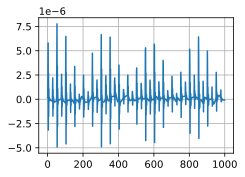

In [80]:
scg_label = scg_simulate(n_echo = 0)
scg, label = scg_label[:1000], scg_label[-6:]
PLOT_Jiayu.plot(scg)

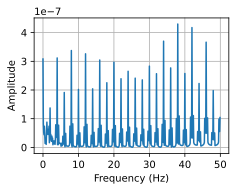

In [81]:
x_fft, y_fft = cal_fft(scg, 100, show=True)

In [82]:
def gaussian_window(length, std_dev):
    """ 生成高斯窗口 """
    n = np.arange(0, length) - (length - 1.0) / 2
    return np.exp(-0.5 * (n / std_dev) ** 2)

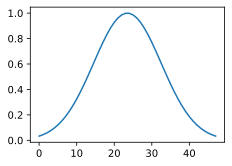

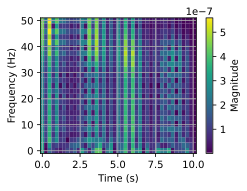

In [101]:
# 感觉Gabor Transform相当于使用了Gaussian Window的STFT


# 使用Gaussian Window的优势
# 1. 能达到最小的时间-频率积
# 2. 能有效的保持形状，时域和频域下，都是高斯函数。有助于分析，因为其频域形状可以预测
# 3. 边缘柔和


# 相比与Hann窗的STFT，Gabor Transform可以调整Gaussian Window的标准差，从而进一步调整
# 我个人感觉，好像用起来，差不多

std = 9
window_length = 48

plt.plot(gaussian_window(window_length, std_dev=std))

freqs, times, stft_matrix = cal_stft(scg, 100, nperseg=window_length, window=gaussian_window(window_length, std_dev=std),show=True)


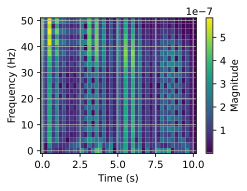

In [96]:
freqs, times, stft_matrix = cal_stft(scg, 100, nperseg=window_length, show=True)

In [6]:
from NRSR_Tutorial.dsp import time_centroid_width, frequency_centroid_width
sampling_rate = 100

time_centroid, time_width = time_centroid_width(scg, sampling_rate)
frequency_centroid, frequency_width = frequency_centroid_width(scg, sampling_rate)

time_centroid, frequency_centroid

(4.312433826559306, 20.77777921507695)

(0.07291689019684469, 21.681339707579557)

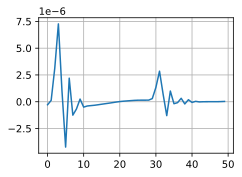

In [7]:
from NRSR_Tutorial.dsp import time_centroid_width, frequency_centroid_width
sampling_rate = 100

scg_template = scg[:int(60*sampling_rate//label[2])]

PLOT_Jiayu.plot(scg_template)

time_centroid, time_width = time_centroid_width(scg_template, sampling_rate)
frequency_centroid, frequency_width = frequency_centroid_width(scg_template, sampling_rate)

time_centroid, frequency_centroid

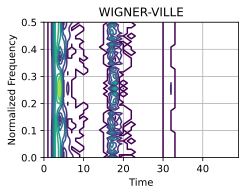

In [8]:
from tftb.processing import WignerVilleDistribution



wvd = WignerVilleDistribution(scg_template)
wvd.run()
wvd.plot(kind='contour')


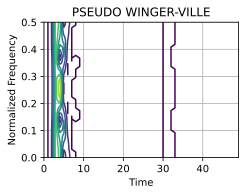

In [9]:
from tftb.processing import PseudoWignerVilleDistribution
pwvd = PseudoWignerVilleDistribution(scg_template)
pwvd.run()
pwvd.plot(kind='contour')